<a href="https://colab.research.google.com/github/DavidSchneider47/National-TOD-Atlas/blob/main/NTD_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the File**

In [ ]:
# Let's read the uploaded file to understand its contents
import pandas as pd

file_path = '/content/Final__NTD_Station_Data_REDUCED.csv'
data = pd.read_csv(file_path)
data.head()


,NTD ID,Agency Name,Primary Mode Served,Facility ID,Facility Type,Facility Name,Street Address,City,State,ZIP Code,...,Section of a Larger Facility,Year Built or Reconstructed as New,LonLat,full_address,coordinates,County,Category,Definition,NYCT Station Complex,Complex Name
0,1,King County Department of Metro Transit,Streetcar Rail,1849,Simple At-Grade Platform Station,FHSC: S JACKSON ST BETWEEN 1ST AVE S AND OCCID...,S Jackson and Occidental Ave S,Seattle,WA,98104,...,0.0,Year Built or Reconstructed as New,"(-122.3335, 47.59921)","S Jackson and Occidental Ave S, Seattle, WA ,9...","(47.5878163, -122.333248)",King County,6,Modern Streetcar,NaN,NaN
1,1,King County Department of Metro Transit,Streetcar Rail,1850,Simple At-Grade Platform Station,FHSC: S JACKSON ST BETWEEN 5TH AVE S AND 6TH A...,S Jackson and 6th Ave S,Seattle,WA,98104,...,0.0,Year Built or Reconstructed as New,"(-122.3271, 47.5992)","S Jackson and 6th Ave S, Seattle, WA ,98104.0","(47.5725498, -122.3259876)",King County,6,Modern Streetcar,NaN,NaN
2,1,King County Department of Metro Transit,Streetcar Rail,1851,Simple At-Grade Platform Station,FHSC: S JACKSON ST BETWEEN 7TH AVE S AND 8TH A...,S Jackson and 8th Ave S,Seattle,WA,98104,...,0.0,Year Built or Reconstructed as New,"(-122.3233, 47.5992)","S Jackson and 8th Ave S, Seattle, WA ,98104.0","(47.6061389, -122.3328481)",King County,6,Modern Streetcar,NaN,NaN
3,1,King County Department of Metro Transit,Streetcar Rail,1852,Simple At-Grade Platform Station,FHSC: S JACKSON ST BETWEEN 12TH AVE S AND 14TH...,S Jackson and 14th Ave S,Seattle,WA,98144,...,0.0,Year Built or Reconstructed as New,"(-122.3157, 47.59921)","S Jackson and 14th Ave S, Seattle, WA ,98144.0","(47.5537076, -122.3145837)",King County,6,Modern Streetcar,NaN,NaN
4,1,King County Department of Metro Transit,Streetcar Rail,1853,Simple At-Grade Platform Station,FHSC: 14TH AVE S BETWEEN S WASHINGTON ST AND S...,14th Ave S and S Main St,Seattle,WA,98144,...,0.0,Year Built or Reconstructed as New,"(-122.3142, 47.60063)","14th Ave S and S Main St, Seattle, WA ,98144.0","(47.6000151, -122.3141483)",King County,6,Modern Streetcar,NaN,NaN


In [ ]:
data.isnull().sum()

NTD ID                                   0
Agency Name                              0
Primary Mode Served                      0
Facility ID                              0
Facility Type                            0
Facility Name                            0
Street Address                         822
City                                     0
State                                    0
ZIP Code                                 0
Latitude                                 0
Longitude                                0
 Square Feet                             0
Section of a Larger Facility            18
Year Built or Reconstructed as New       0
LonLat                                   0
full_address                             0
coordinates                              0
County                                   0
Category                                 0
Definition                               0
NYCT Station Complex                  3782
Complex Name                          3783
dtype: int6

### **Identify Unique Values of Key Information**

In [ ]:
# To find the count of unique values in the specified columns ("NTD ID", "Facility ID", "City", "State", and "County"),
# we will use the 'nunique()' function from pandas which returns the number of unique elements in the column.

# Columns for which we need the count of unique values
columns_of_interest = ['NTD ID', 'Facility ID', 'City', 'State', 'County']

# Dictionary to store counts of unique values for each column
unique_counts = {}

# Iterating through each column and finding the count of unique values
for column in columns_of_interest:
    unique_counts[column] = data[column].nunique()

unique_counts


{'NTD ID': 69, 'Facility ID': 3813, 'City': 1004, 'State': 33, 'County': 168}

### **Construct Data Visualizations**


 **Stations by Mode**

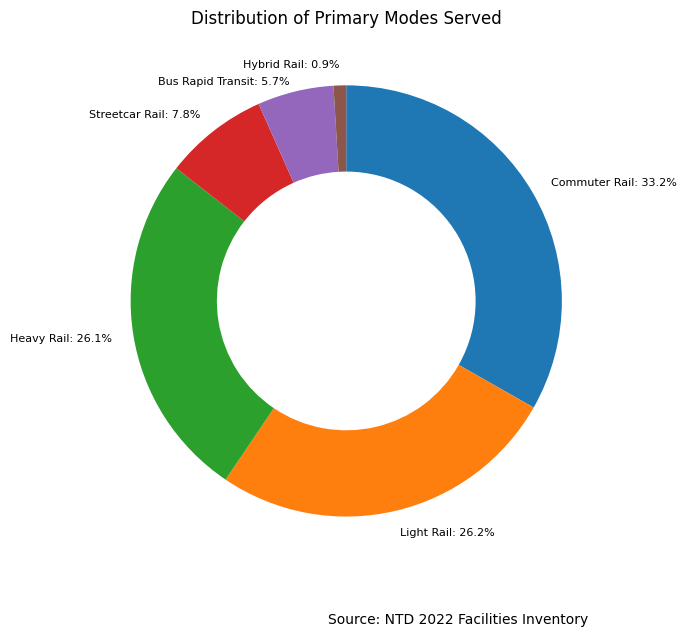

In [ ]:


import matplotlib.pyplot as plt
import pandas as pd

# Reading the data from the CSV file
file_path = '/content/Final__NTD_Station_Data_REDUCED.csv'
data = pd.read_csv(file_path)

# Counting the occurrences of each mode in the "Primary Mode Served" column
mode_counts = data['Primary Mode Served'].value_counts()

# Calculating the total number of modes for percentage calculation
total_modes = mode_counts.sum()

# Generating labels with percentages for each mode
mode_labels_with_percentages = [f'{mode}: {count/total_modes:.1%}' for mode, count in mode_counts.items()]

# Recreating the pie chart with labels and percentages
plt.figure(figsize=(10, 7))
patches, texts = plt.pie(mode_counts.values, labels=mode_labels_with_percentages, startangle=90, counterclock=False, wedgeprops=dict(width=0.4))

# Adjusting the size and position of the labels
for text in texts:
    if "Bus Rapid Transit" in text.get_text():
        # Moving the "Bus Rapid Transit" label slightly down
        position = text.get_position()
        text.set_position((position[0], position[1] - 0.05))
    text.set_size(8)

plt.title('Distribution of Primary Modes Served')

# Adding a source annotation at the bottom right of the chart
plt.annotate('Source: NTD 2022 Facilities Inventory', xy=(1, 0), xycoords='axes fraction', xytext=(-20, -40),
             textcoords='offset points', ha='right', va='bottom')

# Displaying the chart
plt.show()


**Stations by Facility Type**

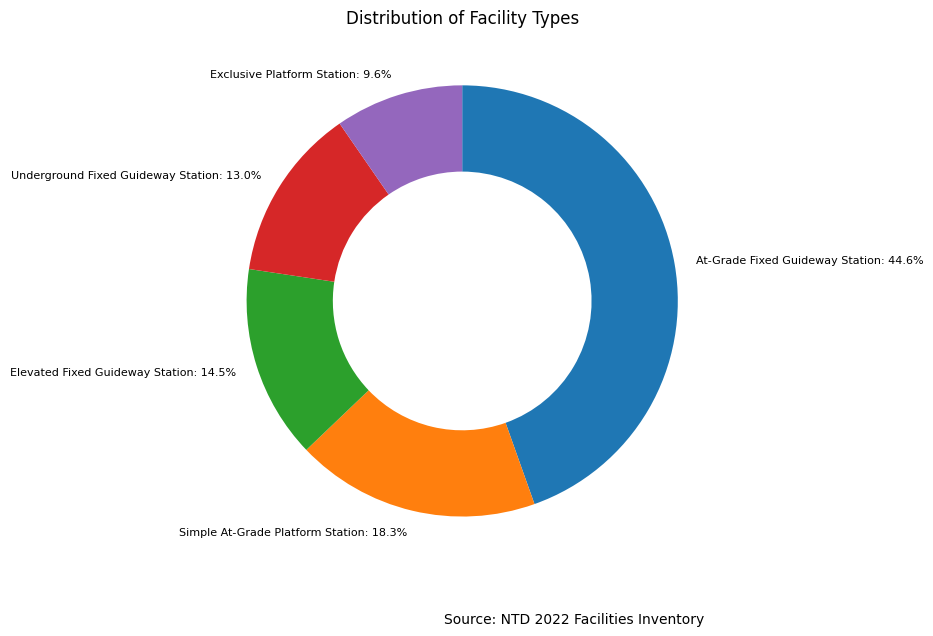

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data from the CSV file
file_path = '/content/Final__NTD_Station_Data_REDUCED.csv'
data = pd.read_csv(file_path)

# Counting the occurrences of each type in the "Facility Type" column
type_counts = data['Facility Type'].value_counts()

# Calculating the total number of types for percentage calculation
total_types = type_counts.sum()

# Generating labels with percentages for each type
type_labels_with_percentages = [f'{ftype}: {count/total_types:.1%}' for ftype, count in type_counts.items()]

# Recreating the pie chart with labels and percentages
plt.figure(figsize=(10, 7))
patches, texts = plt.pie(type_counts.values, labels=type_labels_with_percentages, startangle=90, counterclock=False, wedgeprops=dict(width=0.4))

# Adjusting the size and position of the labels
for text in texts:
    text.set_size(8)

plt.title('Distribution of Facility Types')

# Adding a source annotation at the bottom right of the chart
plt.annotate('Source: NTD 2022 Facilities Inventory', xy=(1, 0), xycoords='axes fraction', xytext=(-20, -40),
             textcoords='offset points', ha='right', va='bottom')

# Displaying the chart
plt.show()


**Stations by Agency: Top 10**

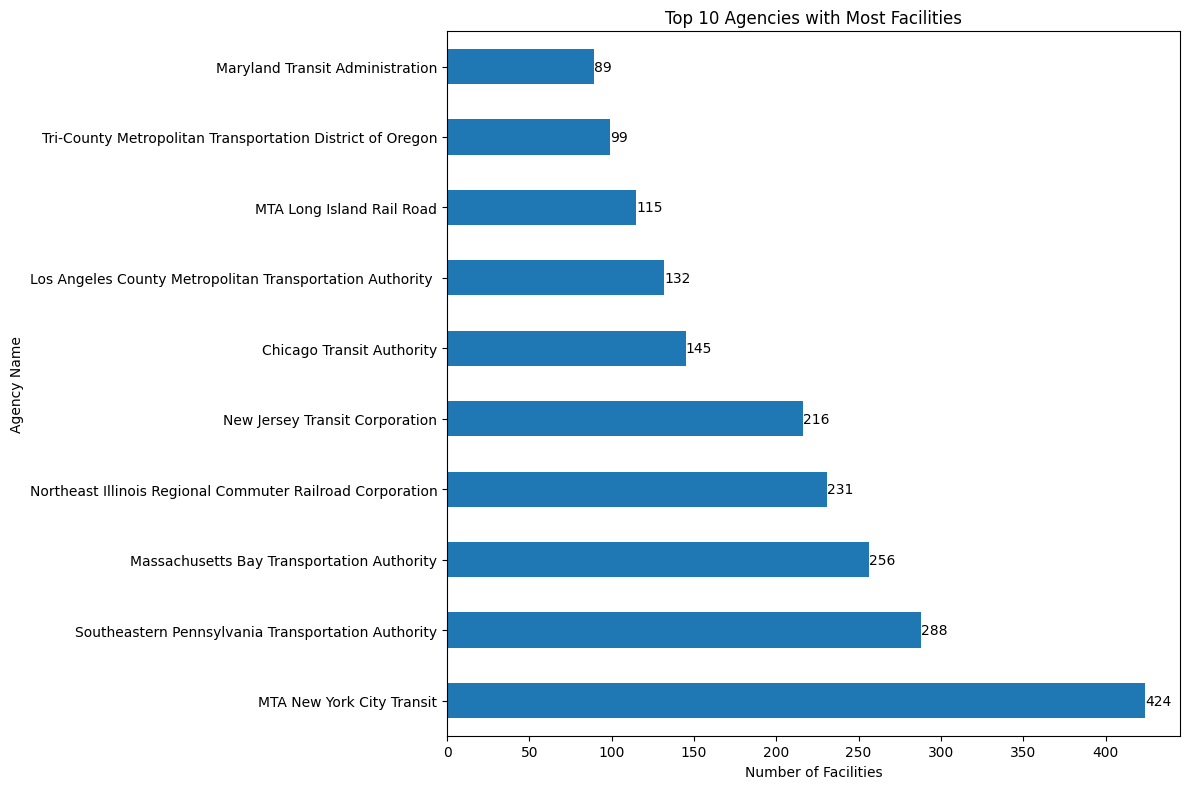

In [ ]:
# It seems the variable 'top_10_agencies' is not defined in this context.
# I'll include the necessary steps to define it before creating the horizontal bar chart.

# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data from the CSV file
file_path = '/content/Final__NTD_Station_Data_REDUCED.csv'
data = pd.read_csv(file_path)

# Counting the number of facilities for each agency
facility_count_by_agency = data.groupby('Agency Name')['Facility ID'].nunique()

# Sorting and selecting the top 10 agencies with the most facilities
top_10_agencies = facility_count_by_agency.sort_values(ascending=False).head(10)

# Creating a horizontal bar chart
plt.figure(figsize=(12, 8))
ax = top_10_agencies.plot(kind='barh')  # Changed to 'barh' for horizontal bars
plt.title('Top 10 Agencies with Most Facilities')
plt.ylabel('Agency Name')
plt.xlabel('Number of Facilities')
plt.tight_layout()

# Adding the count labels next to the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.tight_layout()

# Displaying the chart
plt.show()


### **Box Plot of Stations by Agency**

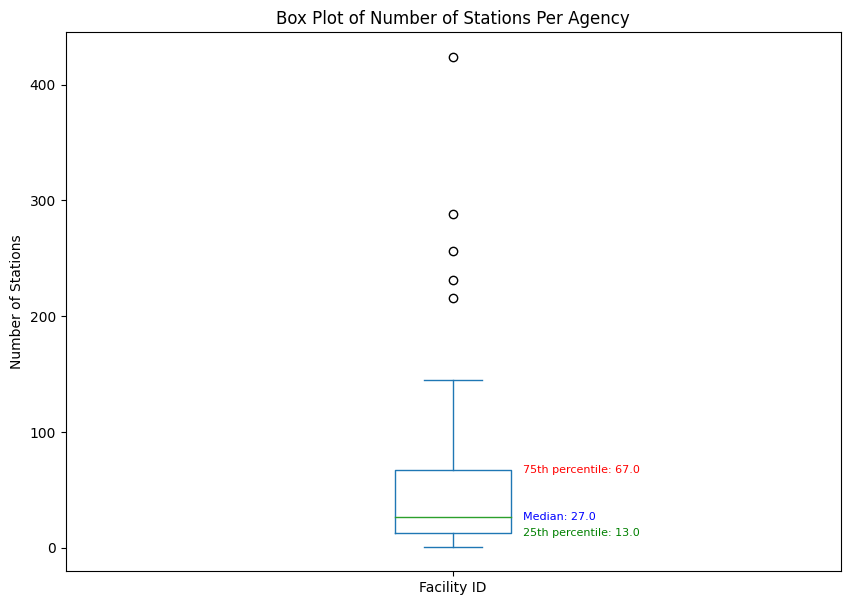

In [ ]:
# Creating a box plot for the number of stations per agency name
plt.figure(figsize=(10, 7))

# Counting the number of stations for each agency
stations_count_by_agency = data.groupby('Agency Name')['Facility ID'].nunique()

# Creating the box plot
boxplot = stations_count_by_agency.plot(kind='box')
plt.title('Box Plot of Number of Stations Per Agency')
plt.ylabel('Number of Stations')

# Calculating the median, 25th, and 75th percentiles
median_value = stations_count_by_agency.median()
percentile_25 = stations_count_by_agency.quantile(0.25)
percentile_75 = stations_count_by_agency.quantile(0.75)

# Adding labels for the median, 25th, and 75th percentiles
plt.text(1.09, median_value, f'Median: {median_value}', verticalalignment='center', fontsize=8, color='blue', transform=boxplot.transData)
plt.text(1.09, percentile_25, f'25th percentile: {percentile_25}', verticalalignment='center', fontsize=8, color='green', transform=boxplot.transData)
plt.text(1.09, percentile_75, f'75th percentile: {percentile_75}', verticalalignment='center', fontsize=8, color='red', transform=boxplot.transData)

# Displaying the box plot
plt.show()


### **Histogram of Stations Per Agency**

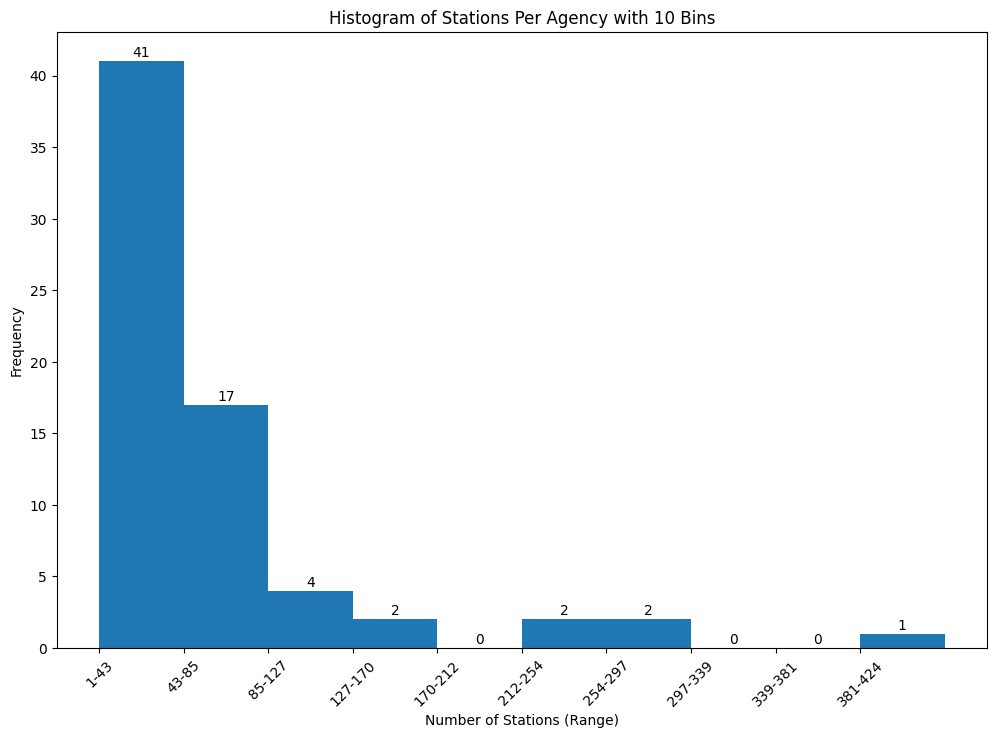

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reading the data from the CSV file
file_path = '/content/Final__NTD_Station_Data_REDUCED.csv'
data = pd.read_csv(file_path)

# Counting the number of stations for each agency
stations_count_by_agency = data.groupby('Agency Name')['Facility ID'].nunique()

# Creating the histogram with 10 bins
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(stations_count_by_agency, bins=10)

# Generating custom x-axis labels for the bins
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=np.arange(bins[0], bins[-1], (bins[-1]-bins[0])/10), labels=bin_labels, rotation=45)

# Adding labels to the bars
for patch in patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 0.1, f'{int(height)}', ha='center', va='bottom')

plt.title('Histogram of Stations Per Agency with 10 Bins')
plt.xlabel('Number of Stations (Range)')
plt.ylabel('Frequency')

# Displaying the histogram
plt.show()


**Stations by Year Built/Rennovated**

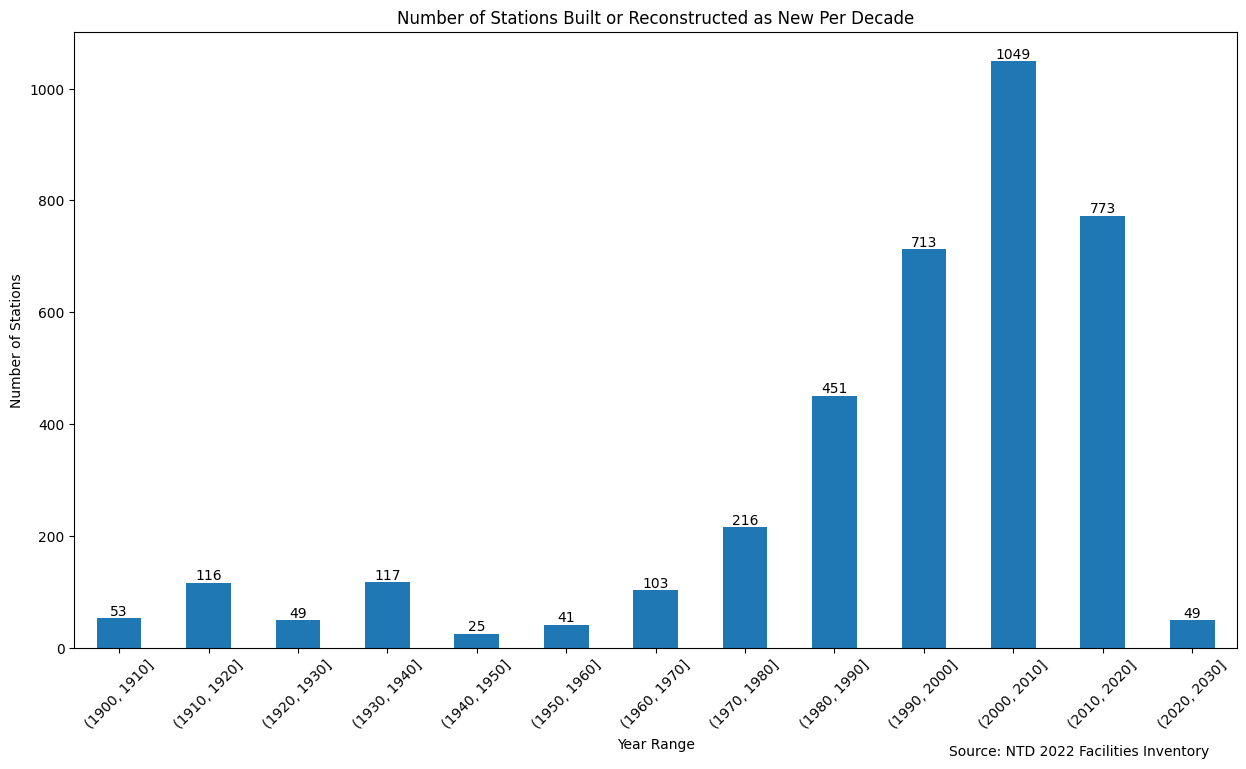

In [ ]:
# Complete code for creating the bar graph with labels and a source note

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reading the data from the CSV file
file_path = '/content/Final__NTD_Station_Data_REDUCEDv2.csv'
data = pd.read_csv(file_path)

# Replacing years 1900 or prior with 1900
data['Year Built or Reconstructed as New'] = data['Year Built or Reconstructed as New'].apply(lambda x: 1900 if x <= 1900 else x)

# Grouping by year ranges
year_ranges = pd.cut(data['Year Built or Reconstructed as New'], bins=np.arange(1900, data['Year Built or Reconstructed as New'].max() + 10, 10))
stations_per_year_range = data.groupby(year_ranges)['Facility ID'].nunique()

# Creating the bar graph
plt.figure(figsize=(15, 8))
ax = stations_per_year_range.plot(kind='bar')
plt.title('Number of Stations Built or Reconstructed as New Per Decade')
plt.xlabel('Year Range')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adding a source annotation at the bottom right of the chart
plt.annotate('Source: NTD 2022 Facilities Inventory', xy=(1, 0), xycoords='axes fraction', xytext=(-20, -80),
             textcoords='offset points', ha='right', va='bottom')
# Displaying the bar graph
plt.show()


**Stations by System Category**

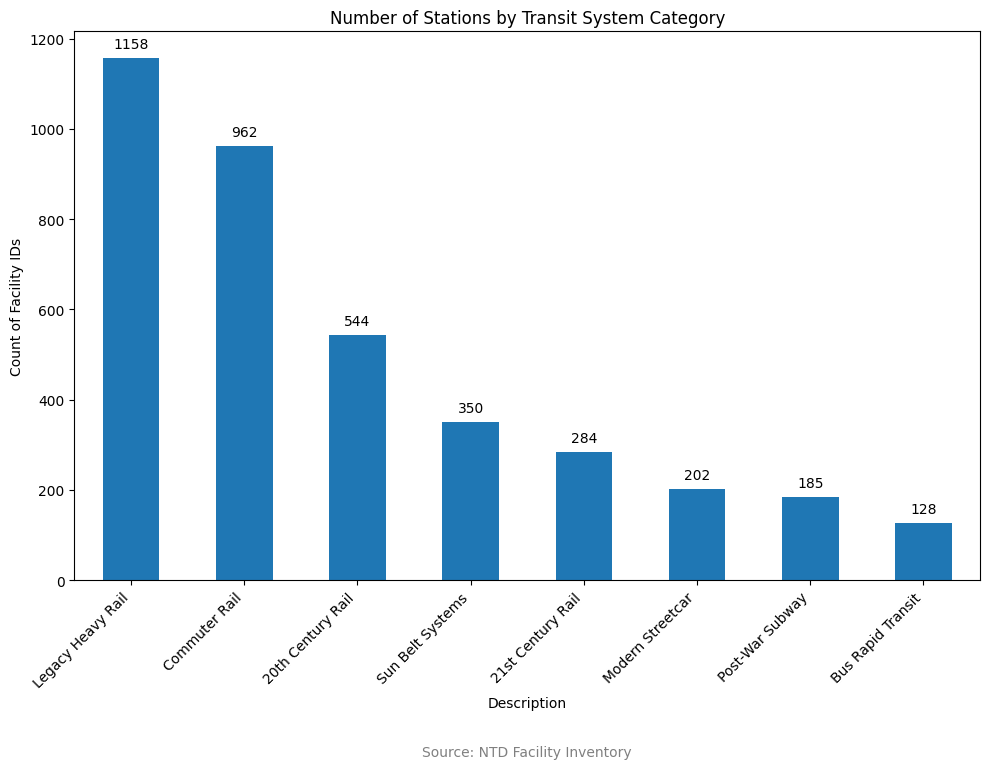

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCED.csv')  # Replace with the correct path to your CSV file

# Count the number of Facility IDs by Description
description_counts = data['Definition'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8))
ax = description_counts.plot(kind='bar', grid=False)
plt.title('Number of Stations by Transit System Category')
plt.xlabel('Description')
plt.ylabel('Count of Facility IDs')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Remove grid lines
ax.grid(False)

# Add the number of facilities towards the center of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# Adjust the position of the source note to be on the same level as the "Description" labels
plt.text(0.5, -0.3, 'Source: NTD Facility Inventory',
         verticalalignment='top', horizontalalignment='center',
         transform=ax.transAxes, fontsize=10, color='grey')

plt.tight_layout()  # Adjust layout to fit labels

# Show the bar chart
plt.show()


# **Display Faciity Type and Mode Served Together**

<Figure size 1500x1000 with 0 Axes>

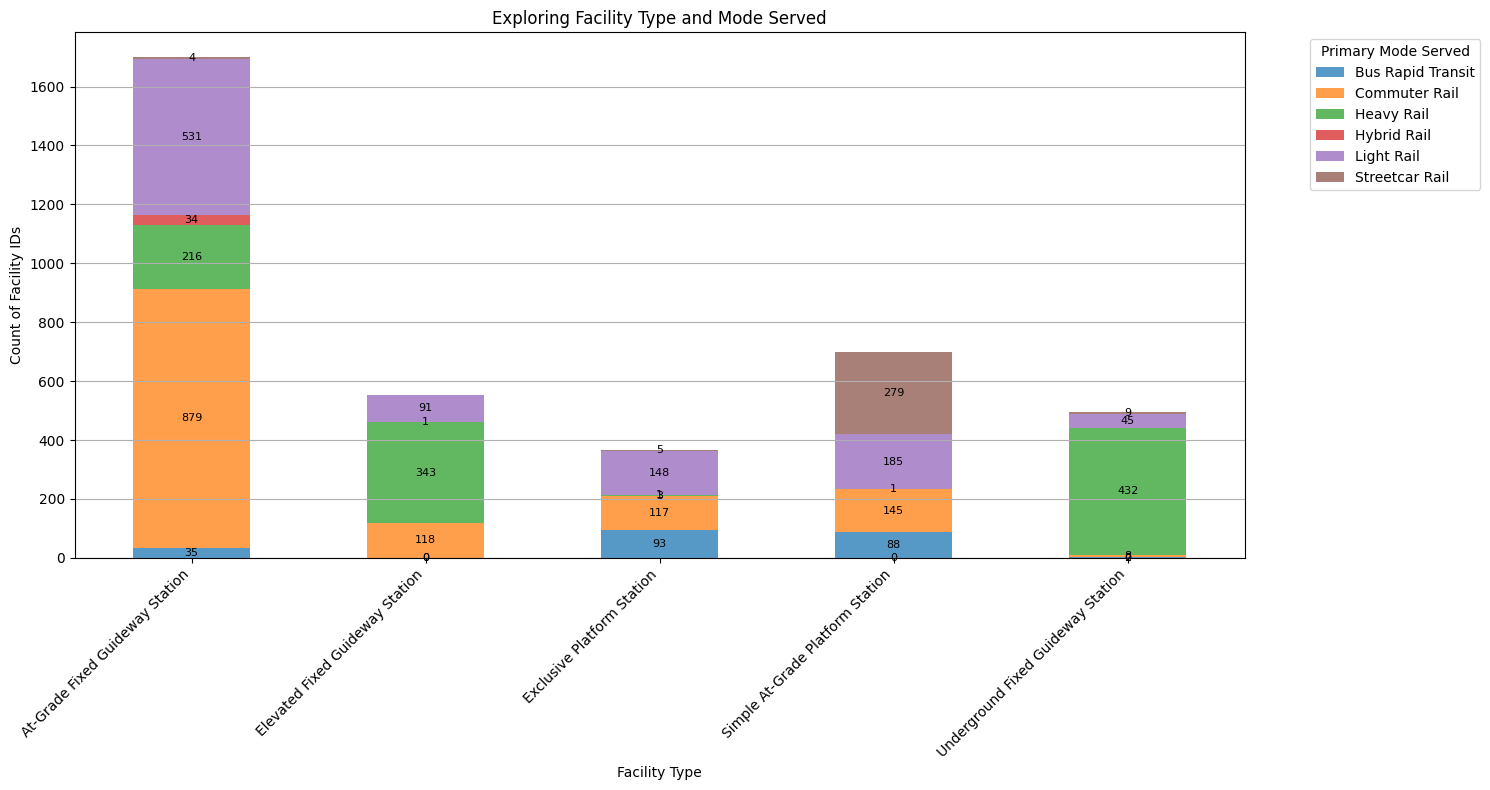

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCED.csv')  # Replace with the correct path to your CSV file

# Preparing the data for the stacked bar chart
grouped_data = data.groupby(['Facility Type', 'Primary Mode Served']).size().unstack().fillna(0)

# Create the stacked bar chart with labels
plt.figure(figsize=(15, 10))
ax = grouped_data.plot(kind='bar', stacked=True, alpha=0.75, rot=0, figsize=(15, 8))

plt.title('Exploring Facility Type and Mode Served')
plt.xlabel('Facility Type')
plt.ylabel('Count of Facility IDs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Primary Mode Served', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Adding labels to each section of the stacked bars
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, int(height),
            ha='center', va='center', fontsize=8, color='black')



# Displaying the bar graph

plt.tight_layout()

# Show the stacked bar chart
plt.show()

# Note: Replace '/path/to/your/stations_clean_final3.csv' with the actual file path of your CSV file.


### **Histogram of Systems with number of Cities Included in Service Area**

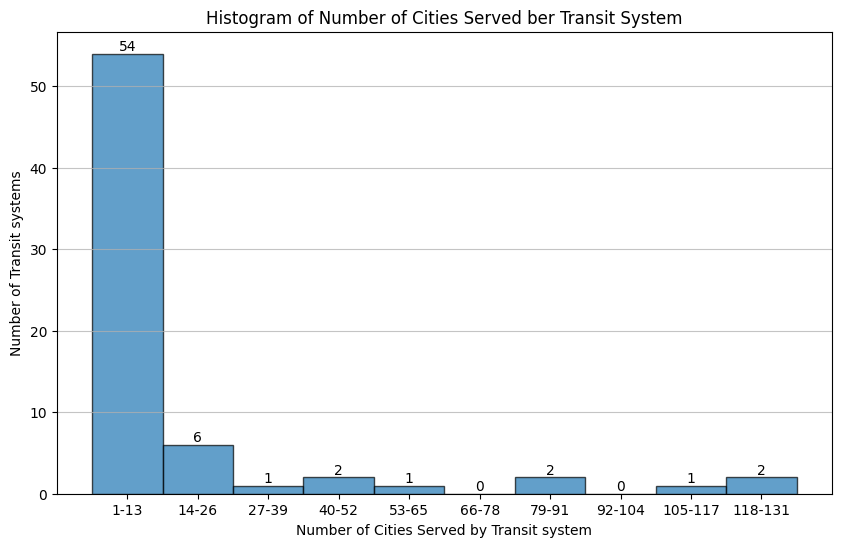

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCED.csv')  # Replace with the correct path to your CSV file

# Counting the number of unique cities for each agency
city_counts_per_agency = data.groupby('Agency Name')['City'].nunique()

# Create a 10-bin histogram with labeled bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(city_counts_per_agency, bins=10, edgecolor='black', alpha=0.7)

# Adding labels for bin counts
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

# Correctly position the bin range labels directly under each bin
bin_labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]
plt.xticks(ticks=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)], labels=bin_labels)

plt.title('Histogram of Number of Cities Served ber Transit System')
plt.xlabel('Number of Cities Served by Transit system')
plt.ylabel('Number of Transit systems')
plt.grid(axis='y', alpha=0.75)



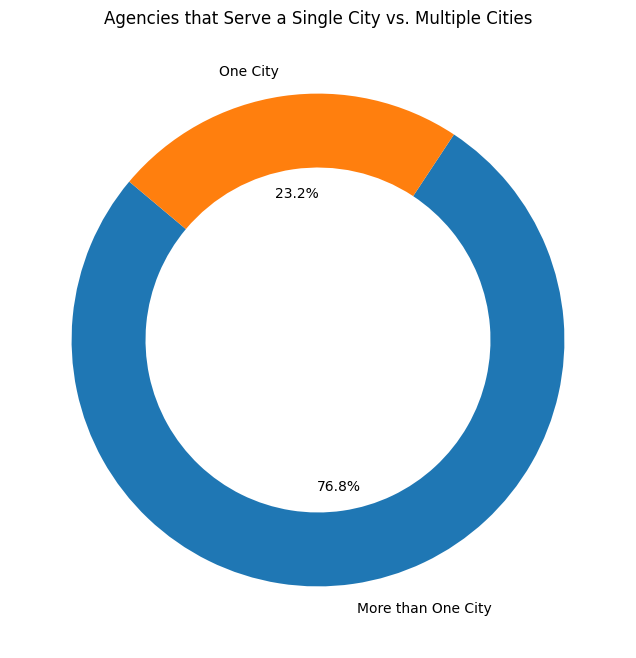

In [ ]:
# Preparing the data for the donut chart
# Counting the number of unique cities for each agency and categorizing them
city_category_counts = city_counts_per_agency.apply(lambda x: 'One City' if x == 1 else 'More than One City').value_counts()

# Create a simple donut chart
plt.figure(figsize=(8, 8))
plt.pie(city_category_counts, labels=city_category_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Agencies that Serve a Single City vs. Multiple Cities')
ax.grid(False)

# Show the donut chart
plt.show()


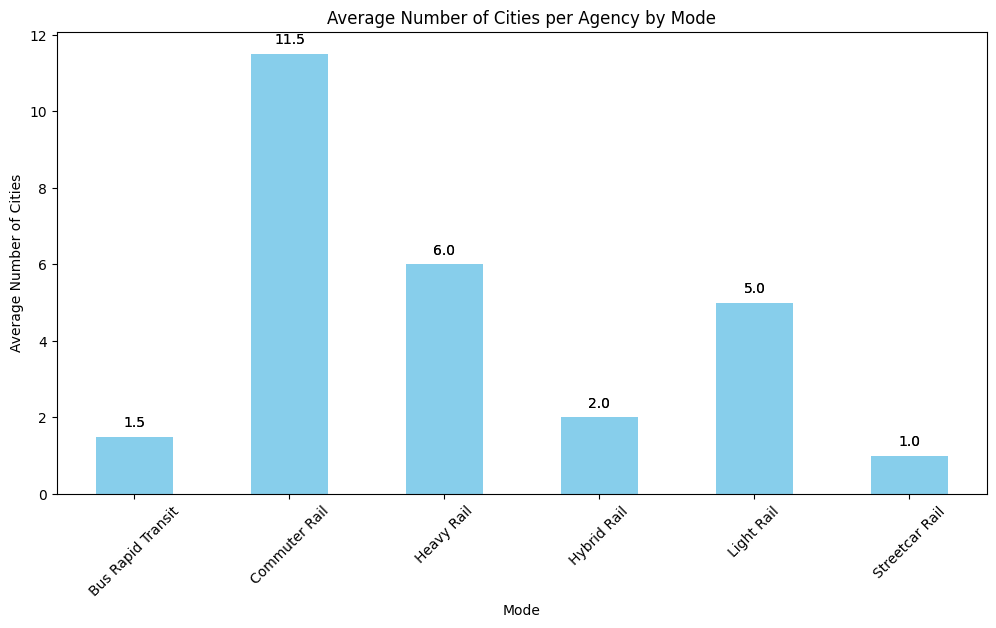

In [ ]:
# Re-importing the necessary libraries and re-loading the data for the bar chart
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCED.csv')  # Replace with the correct path to your CSV file

# Calculating the average number of cities per agency by primary mode served
avg_cities_per_mode = data.groupby(['Primary Mode Served', 'Agency Name'])['City'].nunique()
avg_cities_per_mode = avg_cities_per_mode.groupby('Primary Mode Served').median()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_cities_per_mode.plot(kind='bar', color='skyblue', alpha=0.7)


ax = avg_cities_per_mode.plot(kind='bar', color='skyblue')
plt.title('Average Number of Cities per Agency by Mode')
plt.xlabel('Mode')
plt.ylabel('Average Number of Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
ax.grid(False)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the bar chart
plt.show()


# **Number of Cities Served by System Category**

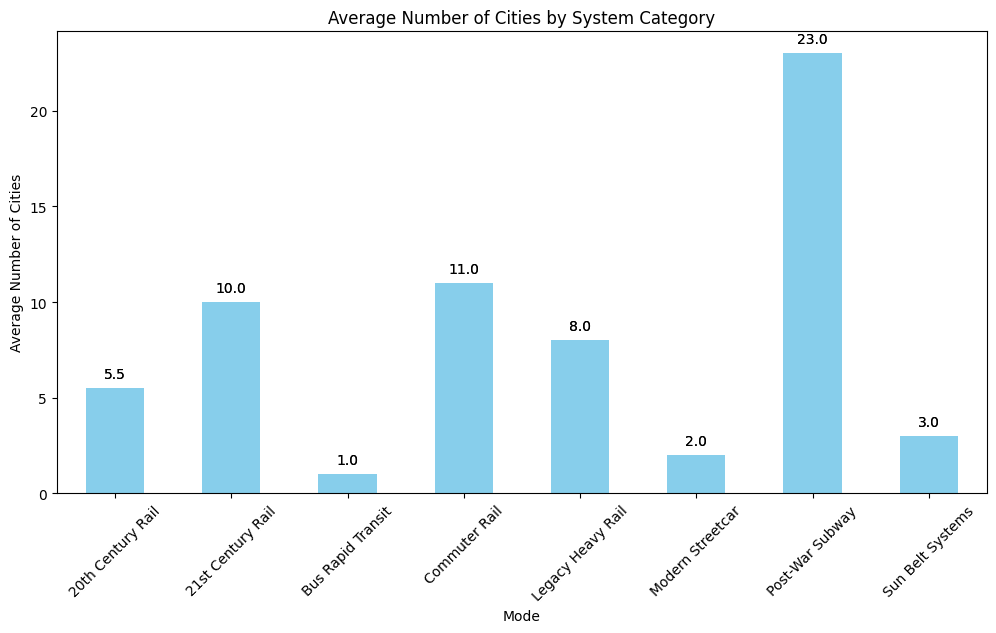

In [ ]:
# Re-importing the necessary libraries and re-loading the data for the bar chart
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCEDv2.csv')  # Replace with the correct path to your CSV file

# Calculating the average number of cities per agency by primary mode served
avg_cities_per_mode = data.groupby(['Definition', 'Agency Name'])['City'].nunique()
avg_cities_per_mode = avg_cities_per_mode.groupby('Definition').median()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_cities_per_mode.plot(kind='bar', color='skyblue', alpha=0.7)


ax = avg_cities_per_mode.plot(kind='bar', color='skyblue')
plt.title('Average Number of Cities by System Category')
plt.xlabel('Mode')
plt.ylabel('Average Number of Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
ax.grid(False)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the bar chart
plt.show()


## **Number of Counties Served by Agency**

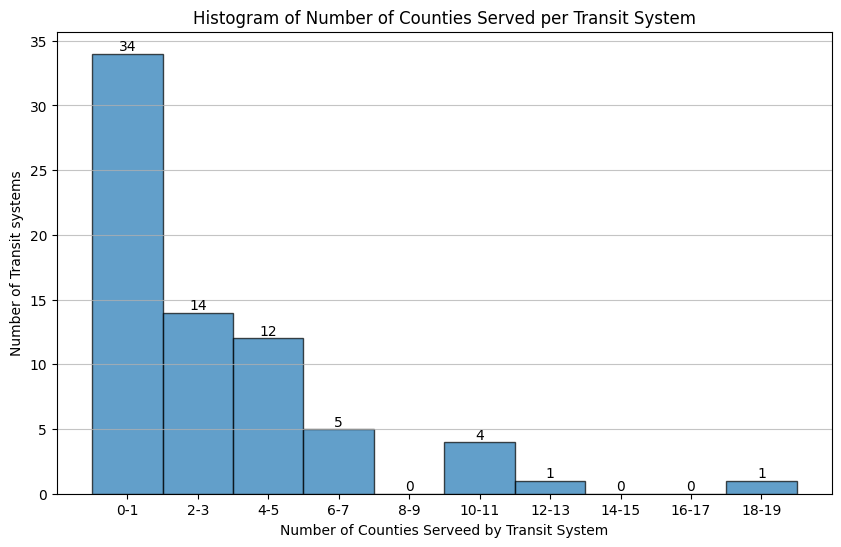

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCEDv2.csv')  # Replace with the correct path to your CSV file

# Counting the number of unique cities for each agency
city_counts_per_agency = data.groupby('Agency Name')['County'].nunique()

# Create a 10-bin histogram with labeled bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(city_counts_per_agency, bins=10, edgecolor='black', alpha=0.7)

# Adding labels for bin counts
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

# Correctly position the bin range labels directly under each bin
bin_labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]
plt.xticks(ticks=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)], labels=bin_labels)

plt.title('Histogram of Number of Counties Served per Transit System')
plt.xlabel('Number of Counties Serveed by Transit System')
plt.ylabel('Number of Transit systems')
plt.grid(axis='y', alpha=0.75)


## ** **Number of Counties Served by Mode**

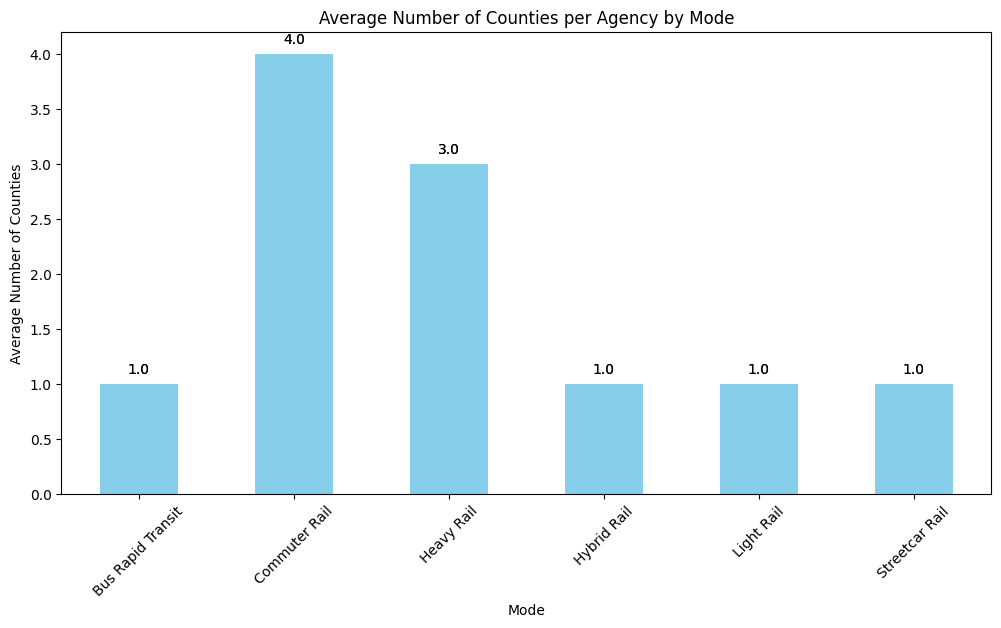

In [ ]:
# Re-importing the necessary libraries and re-loading the data for the bar chart
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCEDv2.csv')  # Replace with the correct path to your CSV file

# Calculating the average number of cities per agency by primary mode served
avg_cities_per_mode = data.groupby(['Primary Mode Served', 'Agency Name'])['County'].nunique()
avg_cities_per_mode = avg_cities_per_mode.groupby('Primary Mode Served').median()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_cities_per_mode.plot(kind='bar', color='skyblue', alpha=0.7)


ax = avg_cities_per_mode.plot(kind='bar', color='skyblue')
plt.title('Average Number of Counties per Agency by Mode')
plt.xlabel('Mode')
plt.ylabel('Average Number of Counties')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
ax.grid(False)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the bar chart
plt.show()


## **Number of Countes Served by System Category**

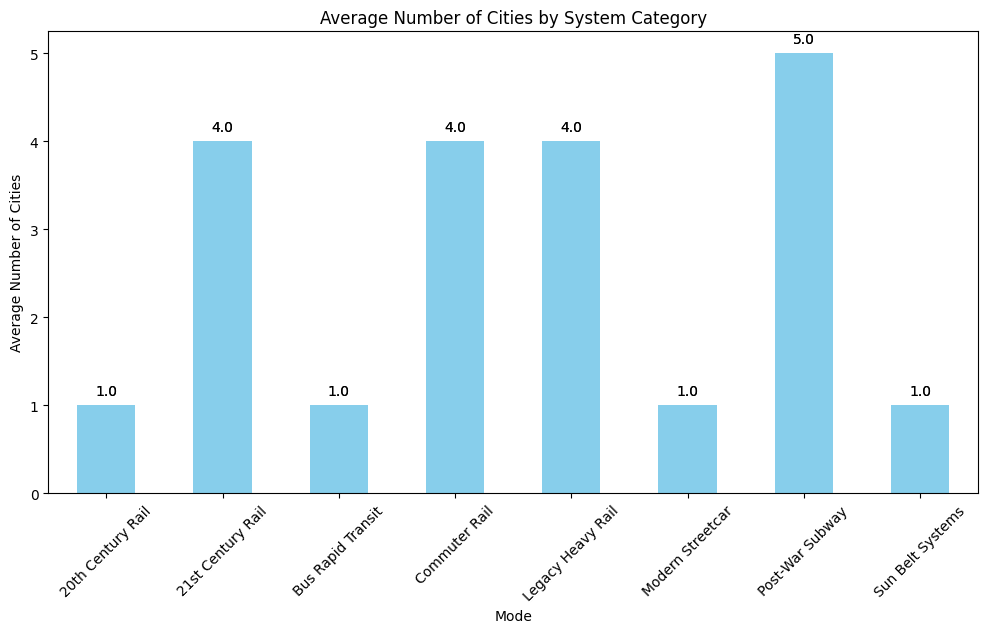

In [ ]:
# Re-importing the necessary libraries and re-loading the data for the bar chart
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Final__NTD_Station_Data_REDUCEDv2.csv')  # Replace with the correct path to your CSV file

# Calculating the average number of cities per agency by primary mode served
avg_cities_per_mode = data.groupby(['Definition', 'Agency Name'])['County'].nunique()
avg_cities_per_mode = avg_cities_per_mode.groupby('Definition').median()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_cities_per_mode.plot(kind='bar', color='skyblue', alpha=0.7)


ax = avg_cities_per_mode.plot(kind='bar', color='skyblue')
plt.title('Average Number of Cities by System Category')
plt.xlabel('Mode')
plt.ylabel('Average Number of Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
ax.grid(False)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the bar chart
plt.show()


## **Station Network Density**

In [ ]:
#Share of stations that have at least one other station within 800 meters
#Number of other stations within 800 meters from a station
## Average distance between the station and other stations-scatter plot
##Number of close stations that serve another transit mode
##Number of close stations that serve another transit agency.
#Station Network Density by System Category

## **Identify the Share of All Stations within 800 Meters of Another Station**

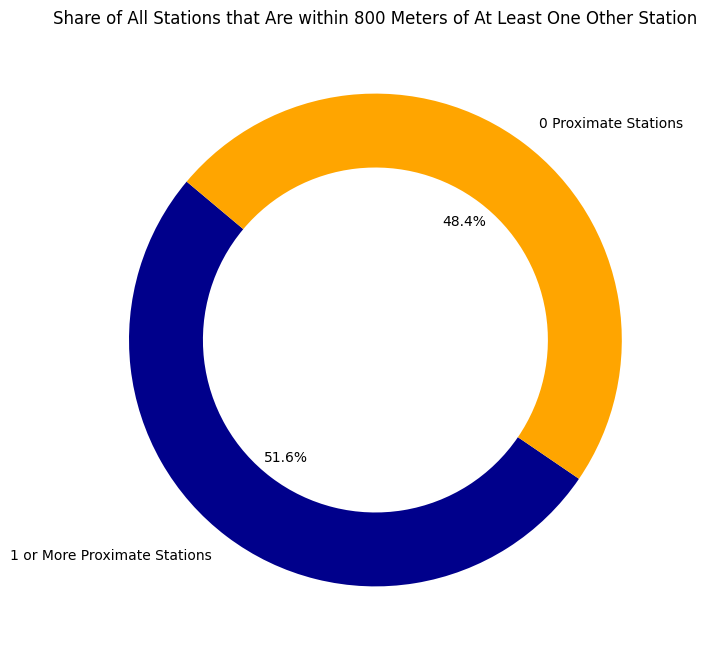

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
# Make sure to upload the CSV file to your Google Colab environment before running this
file_path = '/content/station_network_density_summary.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use ISO-8859-1 encoding to handle potential encoding issues

# Calculate the counts of facilities based on their "Proximate Stations" values
# Facilities with "Proximate Stations" of 0 and facilities with "Proximate Stations" values of 1 or higher
proximate_stations_counts = data["Proximate Stations"].apply(lambda x: '0 Proximate Stations' if x == 0 else '1 or More Proximate Stations').value_counts()

# Create the donut chart for the calculated counts with specified colors
plt.figure(figsize=(8, 8))
plt.pie(proximate_stations_counts, labels=proximate_stations_counts.index, colors=['darkblue', 'orange'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Share of All Stations that Are within 800 Meters of At Least One Other Station')

# Show the donut chart
plt.show()


## **Histogram of Number of Proximate Stations**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reading the data from the CSV file
file_path = '/content/station_network_density_summary.csv'
data = pd.read_csv(file_path)


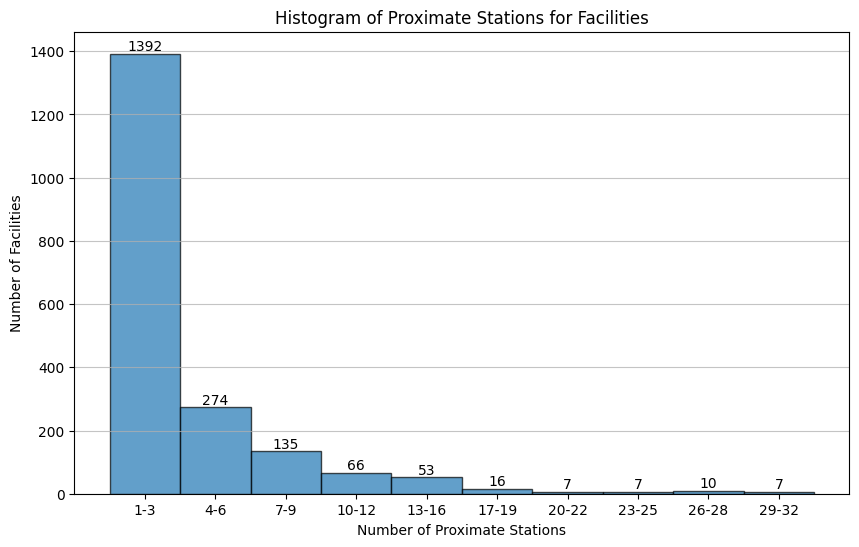

In [ ]:
# Filter out facilities with a "Proximate Stations" value of 0
filtered_data = data[data['Proximate Stations'] > 0]

# Create a 10-bin histogram with labeled bins for "Proximate Stations"
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_data['Proximate Stations'], bins=10, edgecolor='black', alpha=0.7)

# Adding labels for bin counts
for i in range(len(n)):
    # Calculate the bin center
    bin_center = bins[i] + (bins[i+1]-bins[i])/2
    # Place text at the bin center
    plt.text(bin_center, n[i], str(int(n[i])), ha='center', va='bottom')

# Correctly position the bin range labels directly under each bin
bin_labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]
plt.xticks(ticks=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)], labels=bin_labels)

plt.title('Histogram of Stations for Facilities')
plt.xlabel('Number of Proximate Stations')
plt.ylabel('Number of Facilities')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


## **Identify the Proportion of Stations that Include a Link to Another Mode and Another System**

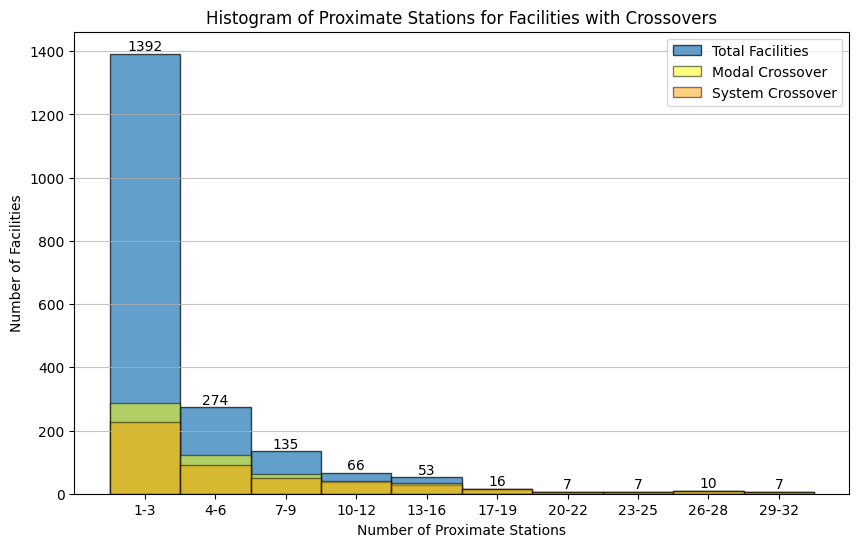

In [ ]:
# Filter out facilities with a "Proximate Stations" value of 0
filtered_data = data[data['Proximate Stations'] > 0]

# Prepare the data for "modal crossover (y/n)" = 1 and "system crossover (y/n)" = 1
modal_crossover_data = filtered_data[filtered_data['Modal Crossover (y/n)'] == 1]
system_crossover_data = filtered_data[filtered_data['System Crossover (y/n)'] == 1]

# Create the base 10-bin histogram for "Proximate Stations"
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_data['Proximate Stations'], bins=10, edgecolor='black', alpha=0.7, label='Total Facilities')

# Overlay the histogram for modal crossover in yellow
plt.hist(modal_crossover_data['Proximate Stations'], bins=bins, edgecolor='black', alpha=0.5, color='yellow', label='Modal Crossover')

# Overlay the histogram for system crossover in orange
plt.hist(system_crossover_data['Proximate Stations'], bins=bins, edgecolor='black', alpha=0.5, color='orange', label='System Crossover')

# Adding labels for bin counts on the base histogram
for i in range(len(n)):
    # Calculate the bin center
    bin_center = bins[i] + (bins[i+1]-bins[i])/2
    # Place text at the bin center for the total facilities count
    plt.text(bin_center, n[i], str(int(n[i])), ha='center', va='bottom')

# Correctly position the bin range labels directly under each bin
bin_labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]
plt.xticks(ticks=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)], labels=bin_labels)

plt.title('Histogram of Proximate Stations for Facilities with Crossovers')
plt.xlabel('Number of Proximate Stations')
plt.ylabel('Number of Facilities')
plt.grid(axis='y', alpha=0.75)
plt.legend()

# Show the plot
plt.show()


## **Proximate Stations by Number, Average Distance, and Access to Other Modes and Stations**

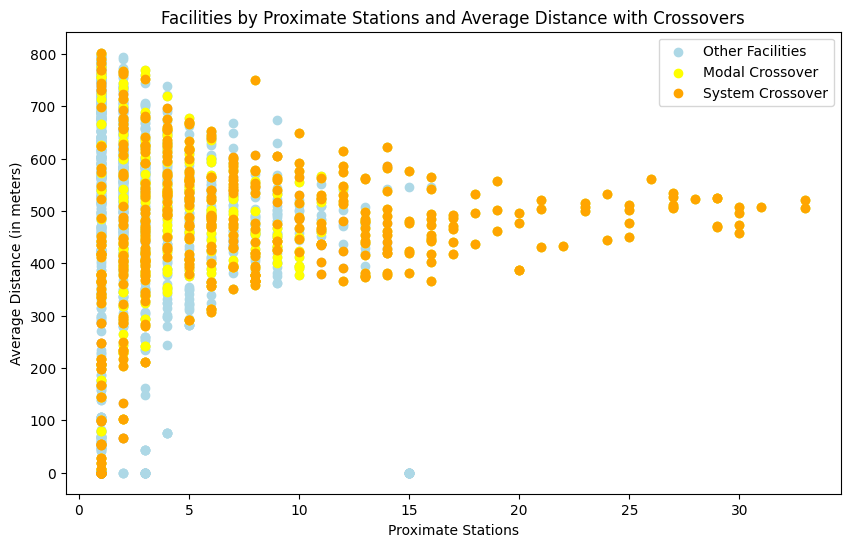

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
# Note: Make sure to upload your CSV file to Google Colab before running this
file_path = '/content/station_network_density_summary.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use ISO-8859-1 encoding to handle potential encoding issues

# Filter the data to include only facility IDs with a "proximate stations" value of 1 or higher
filtered_data = data[data["Proximate Stations"] >= 1]

# Separate the filtered data based on "modal crossover (y/n)" and "system crossover (y/n)" values
modal_crossover_data = filtered_data[filtered_data["Modal Crossover (y/n)"] == 1]
system_crossover_data = filtered_data[filtered_data["System Crossover (y/n)"] == 1]

# Create the scatter plot with specified colors and circles as markers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data["Proximate Stations"], filtered_data["Average Distance"], color='lightblue', marker='o', label='Other Facilities')
plt.scatter(modal_crossover_data["Proximate Stations"], modal_crossover_data["Average Distance"], color='yellow', marker='o', label='Modal Crossover')
plt.scatter(system_crossover_data["Proximate Stations"], system_crossover_data["Average Distance"], color='orange', marker='o', label='System Crossover')

# Set the title, labels for the axes, and legend
plt.title('Facilities by Proximate Stations and Average Distance with Crossovers')
plt.xlabel('Proximate Stations')
plt.ylabel('Average Distance (in meters)')
plt.legend()

# Display the plot
plt.show()
